**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: José Eduardo De Moraes López
*   MATRÍCULA: A01634782
*   NOMBRE: Jorge Andrés Moya Pacheco
*   MATRÍCULA: A00813287
*   NOMBRE: Julio Miguel Díaz de León García
*   MATRÍCULA: A01796215
*   NOMBRE: Julio de Jesús Alvarez Martínez
*   MATRÍCULA: A01374016

In [ ]:
# !pip installd rive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
#bos.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cereals_df = pd.read_csv('C:/Users/julio/Downloads/Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

* Revisemos si hay nulos

In [ ]:
porcentaje_nulos = cereals_df.isna().mean() * 100

In [ ]:
porcentaje_nulos

name        0.000000
mfr         0.000000
type        0.000000
calories    0.000000
protein     0.000000
fat         0.000000
sodium      0.000000
fiber       0.000000
carbo       1.298701
sugars      1.298701
potass      2.597403
vitamins    0.000000
shelf       0.000000
weight      0.000000
cups        0.000000
rating      0.000000
dtype: float64

* Variables numéricas

In [ ]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
num_cols = cereals_df.select_dtypes(include=np.number).columns.tolist()

* Creamos los histogramas para las variables numéricas

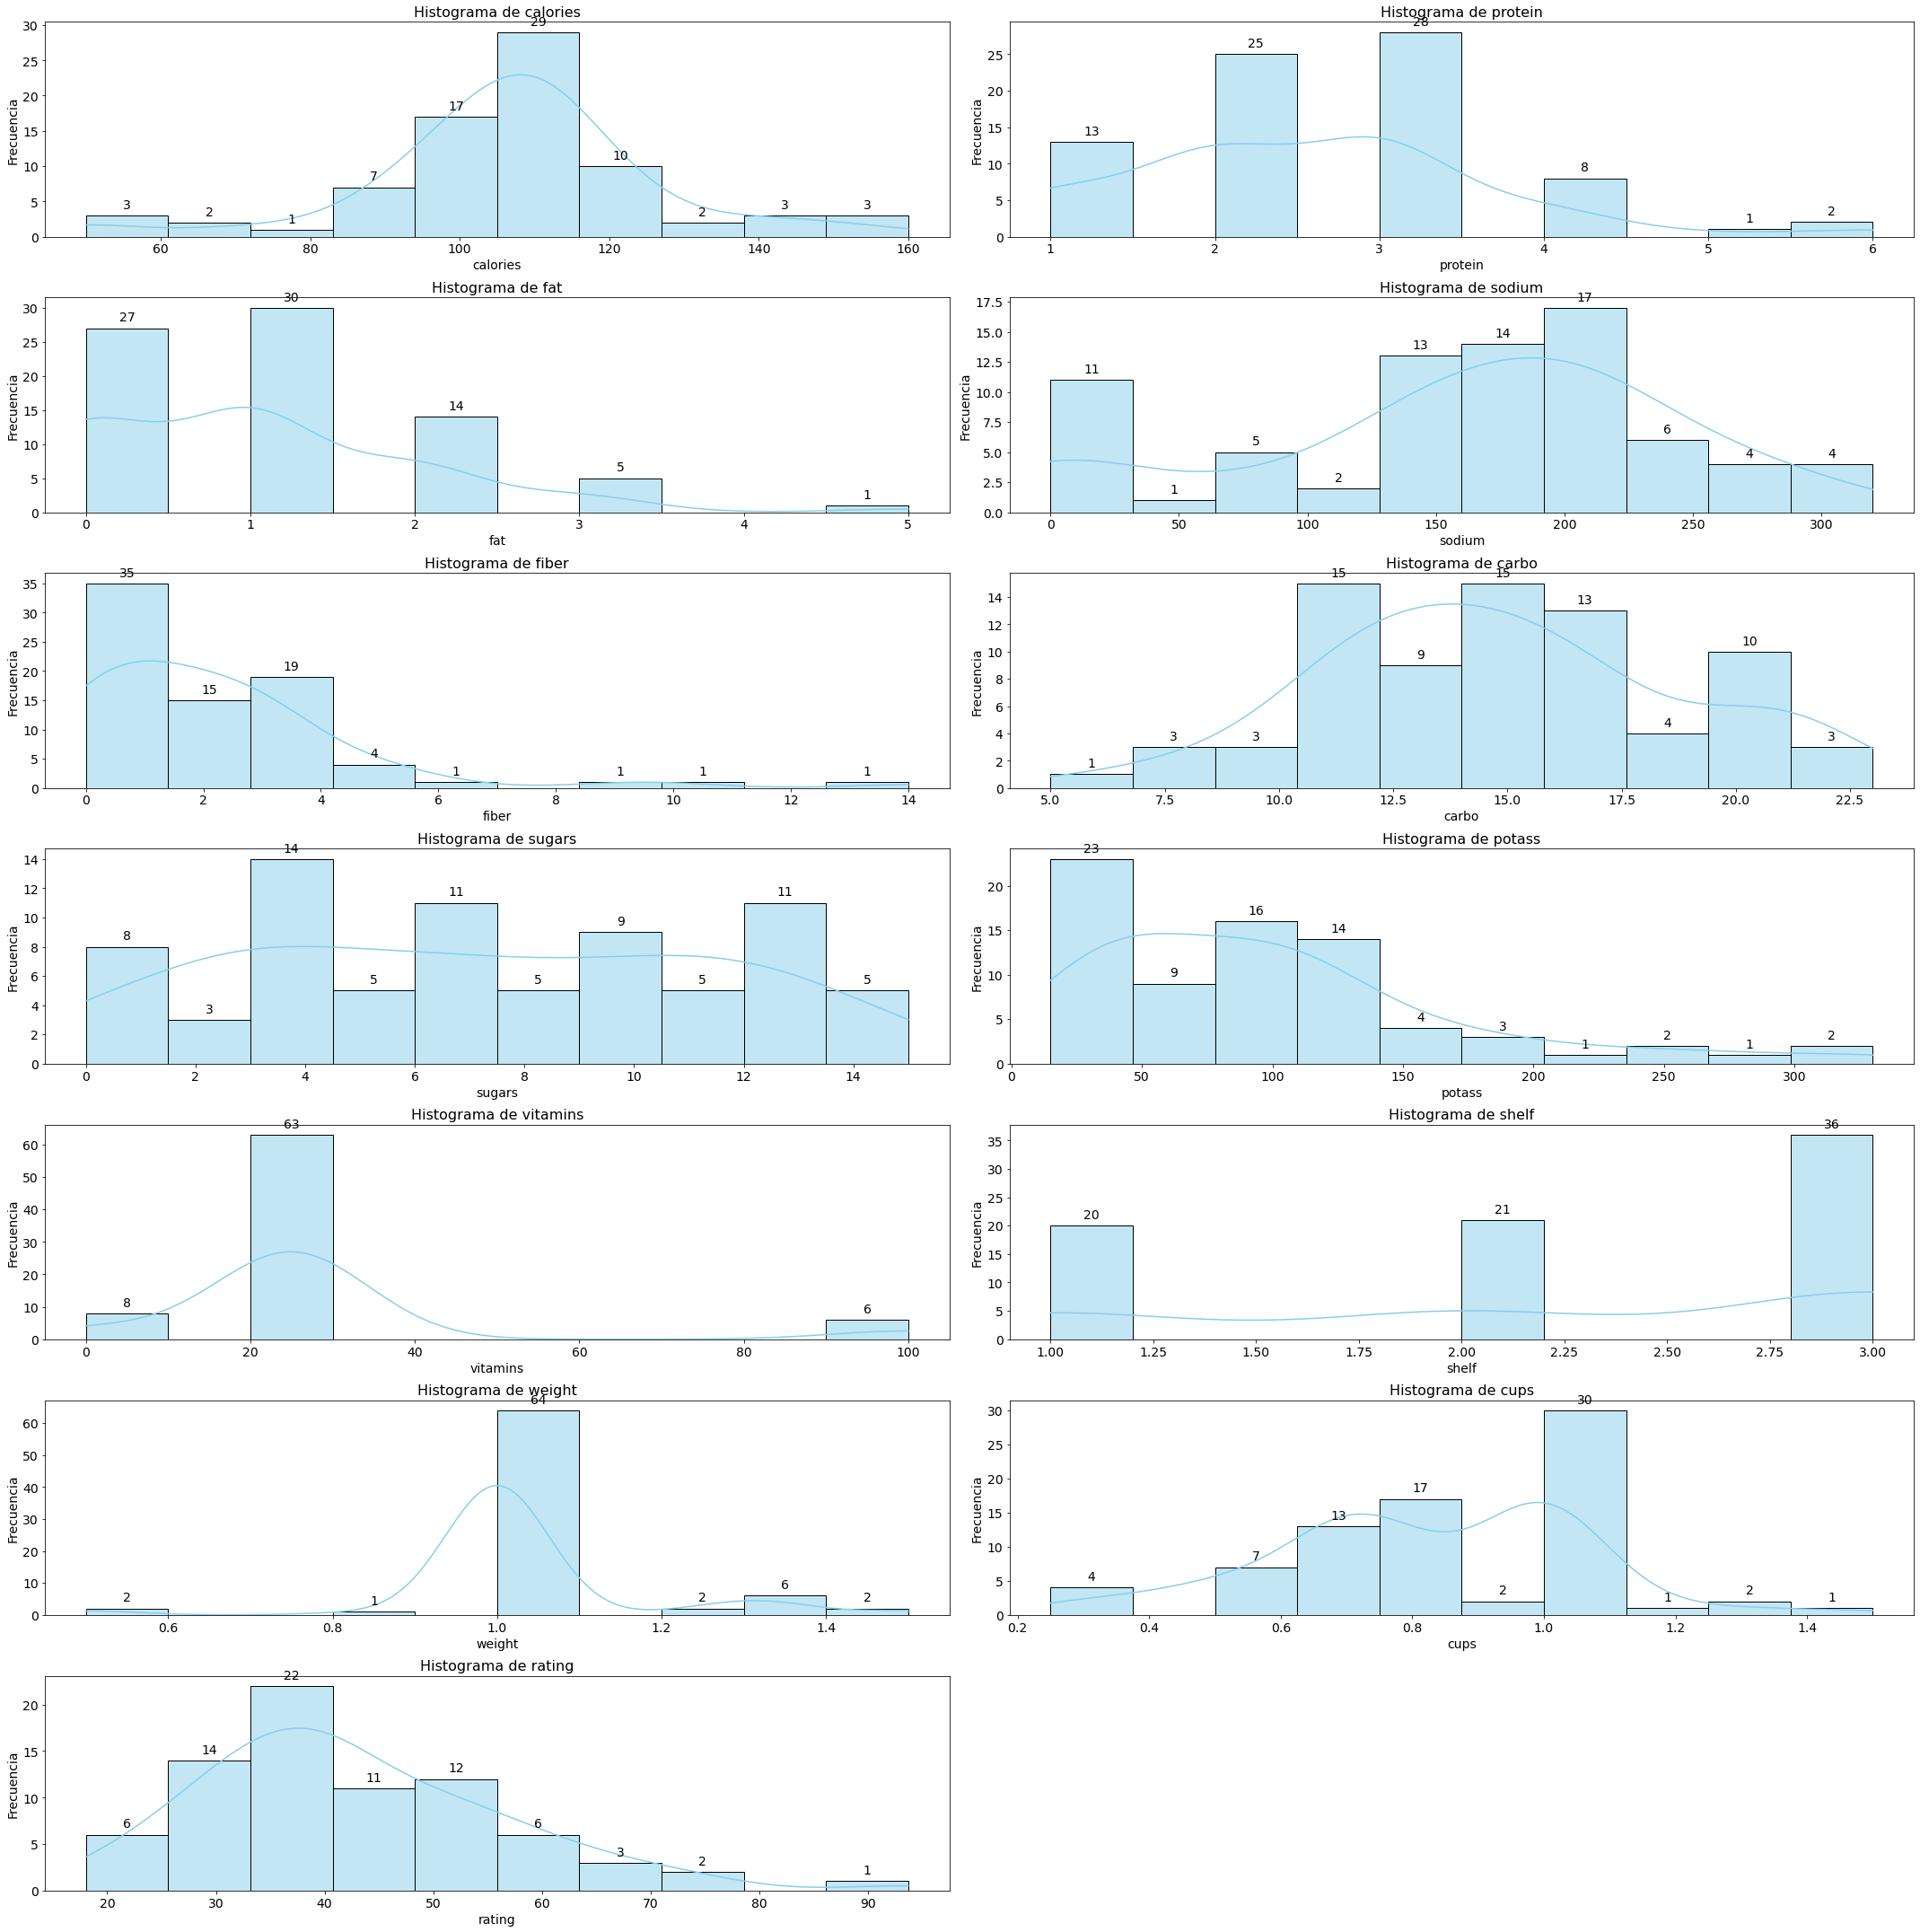

In [ ]:
# Crear una cuadrícula de 7 filas y 2 columnas de subplots (total 14 subplots)
fig, axes = plt.subplots(7, 2, figsize=(30, 30))
axes = axes.ravel()  # Aplanar la matriz de ejes para facilitar la iteración


num_graficos = 14

# Iterar sobre las columnas y los ejes correspondientes
for i, (col, ax) in enumerate(zip(num_cols[:num_graficos], axes[:num_graficos])):
    # Crear un histograma con histplot y añadir KDE para suavizar la curva
    sns.histplot(data=cereals_df, x=col, kde=True, ax=ax, bins=10, color='skyblue', edgecolor='black')

    # Configurar etiquetas y título
    ax.set_xlabel(f'{col}', fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)
    ax.set_title(f'Histograma de {col}', fontsize=16)

    # Ajustar el tamaño
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Agregar etiquetas
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(patch.get_x() + patch.get_width() / 2, height),
                        xytext=(0, 5),  # Desplazamiento de 5 puntos hacia arriba
                        textcoords='offset points',
                        ha='center', va='bottom',
                        fontsize=14, color='black')

# Eliminar el subplot sobrante
fig.delaxes(axes[-1])  # Elimina el último subplot, ya que solo necesitamos 13

for j in range(num_graficos, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


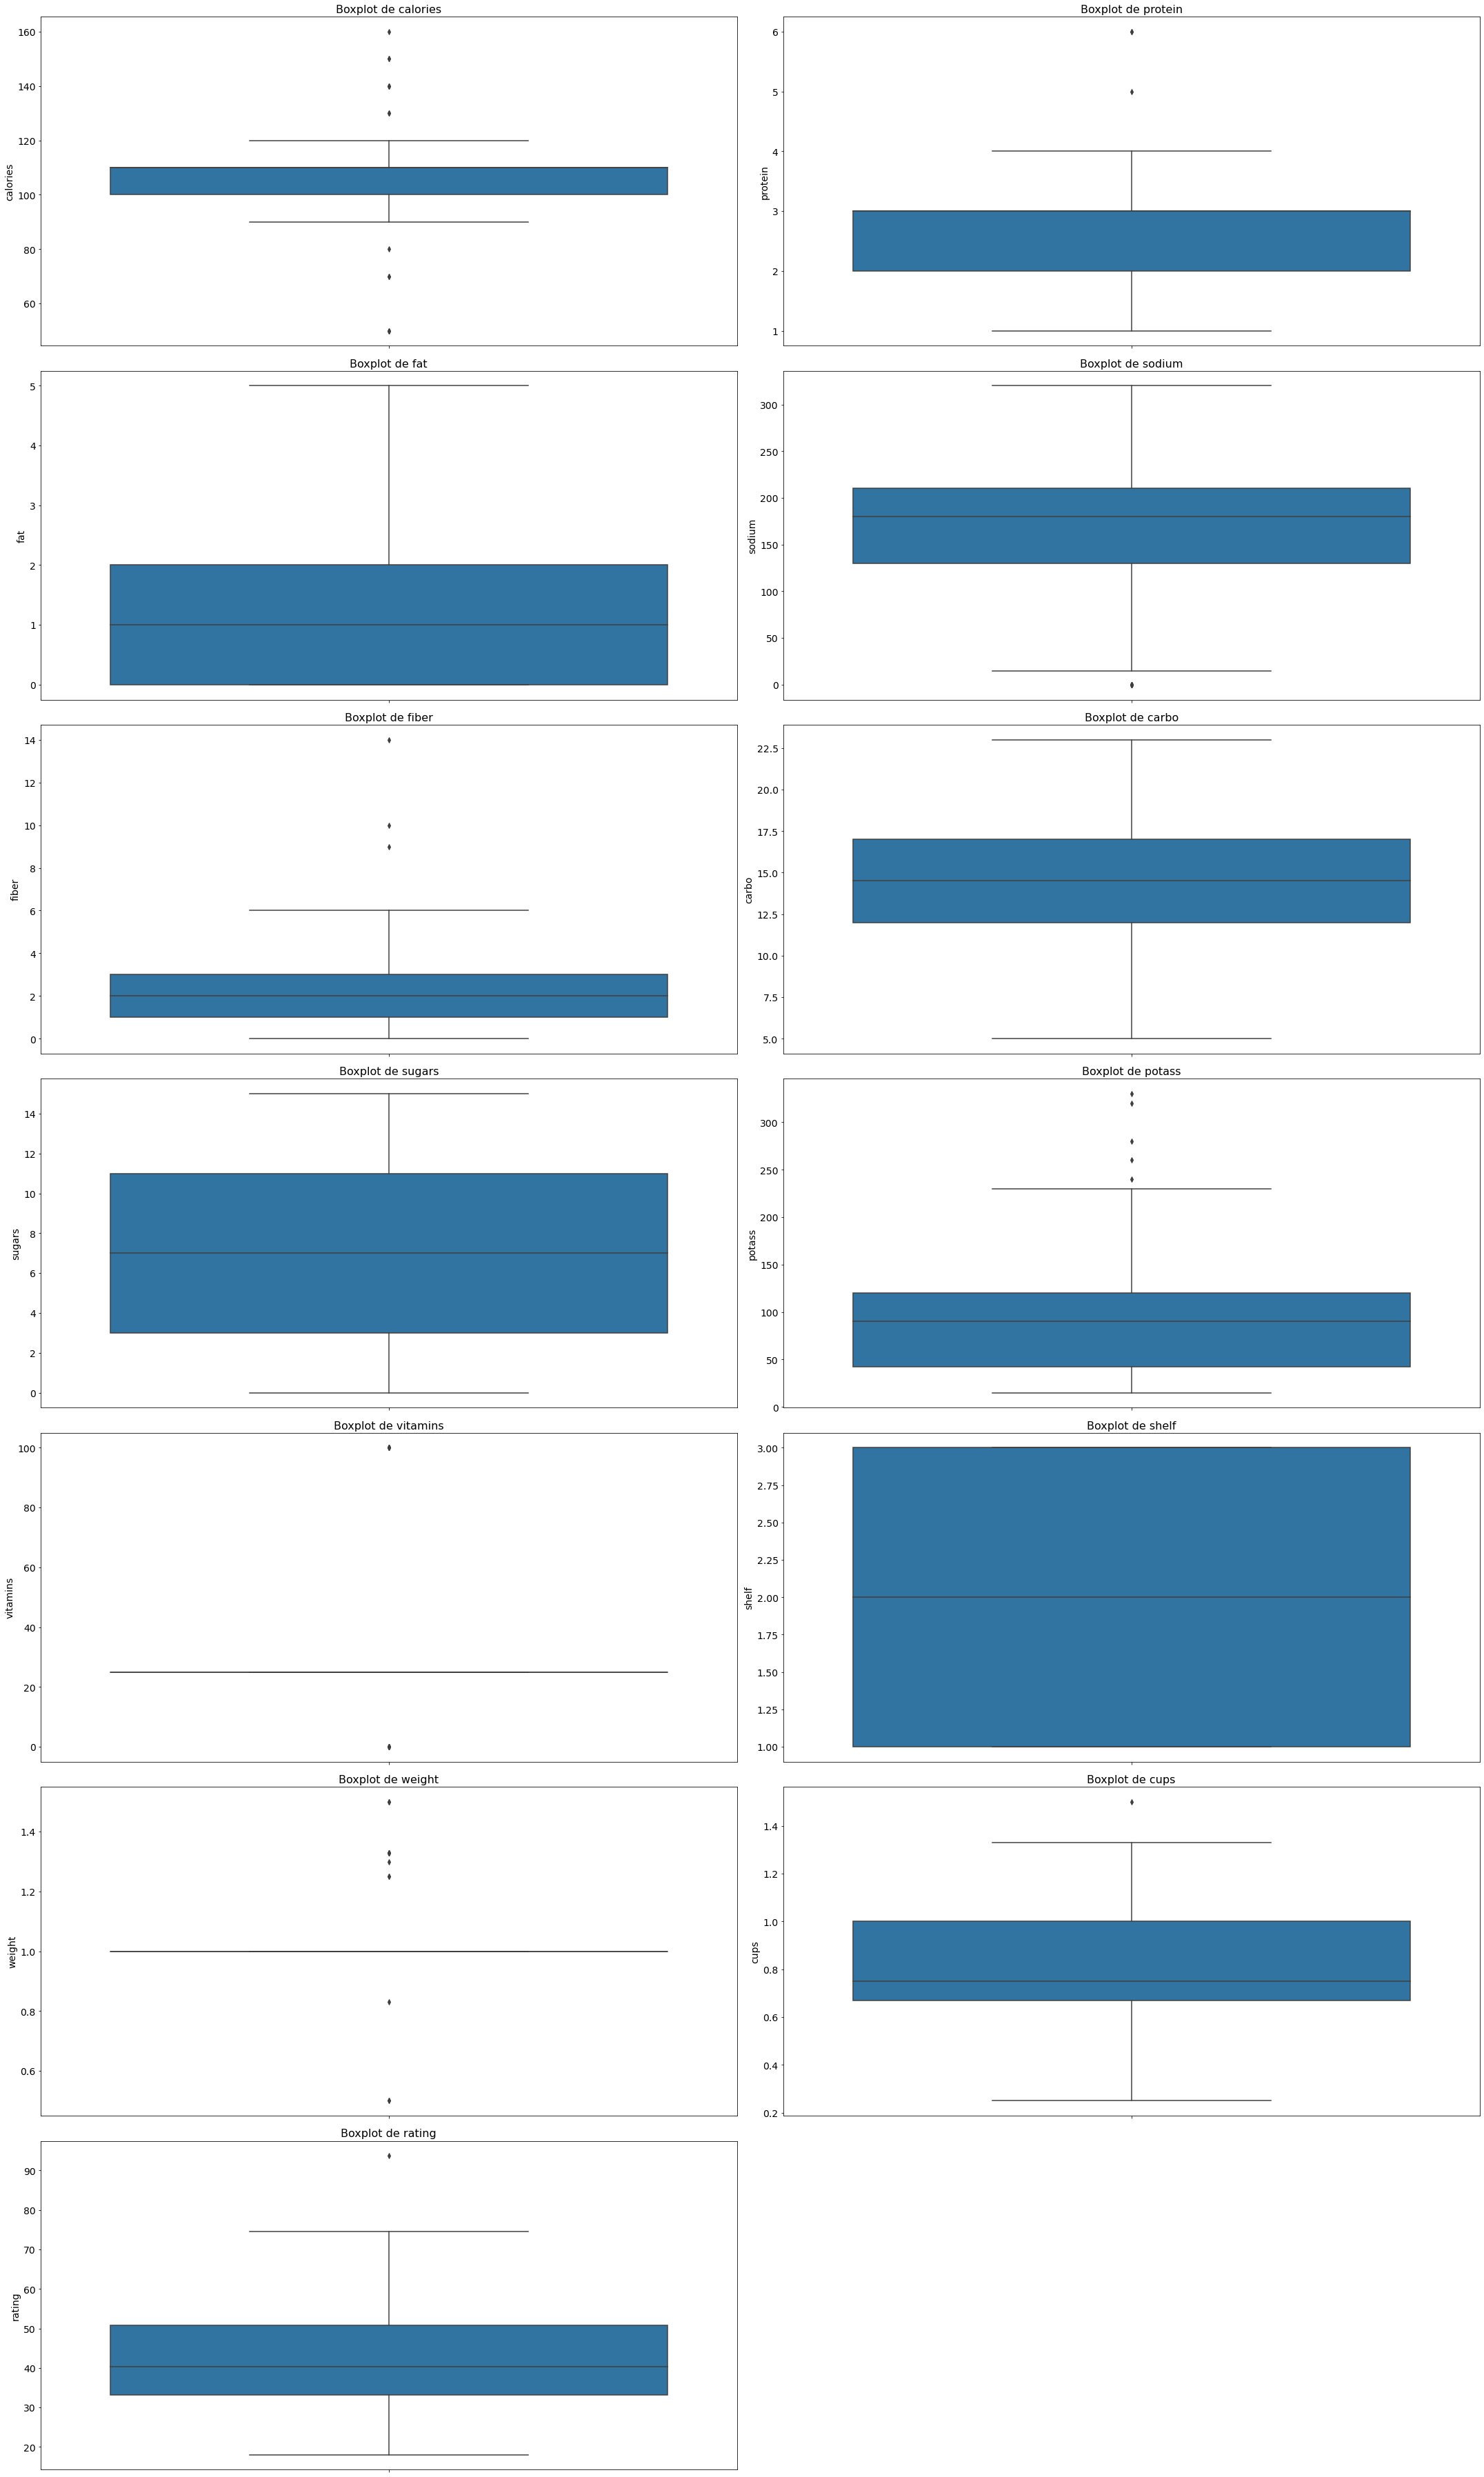

In [ ]:

fig, axes = plt.subplots(7, 2, figsize=(30, 50))  # 7 filas, 2 columnas, total 14 subplots
axes = axes.ravel()  # Convertir la matriz de ejes en un arreglo 1D para iterar más fácilmente

# Solo necesitamos 13 gráficos, así que quitamos el último subplot
for col, ax in zip(num_cols[:13], axes[:13]):  # num_cols[:13] selecciona las primeras 13 columnas numéricas
    sns.boxplot(data=cereals_df, y=col, ax=ax)
    ax.set_title(f'Boxplot de {col}', fontsize=16)  # Agrega un título a cada gráfico
    ax.set_xlabel('')
    ax.set_ylabel(f'{col}', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Eliminar el subplot sobrante
fig.delaxes(axes[-1])  # Elimina el último subplot, ya que solo necesitamos 13

plt.tight_layout()
plt.show()


* Variables categóricas

In [ ]:
cereals_df.describe(include = 'object')

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


* Graficas de barras para las variables categóricas

Podemos ver que tenemos tantos valores distintos como registros en `name`, por lo que no la graficamos

In [ ]:
cat_cols_graf= cereals_df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols_graf.remove('name')

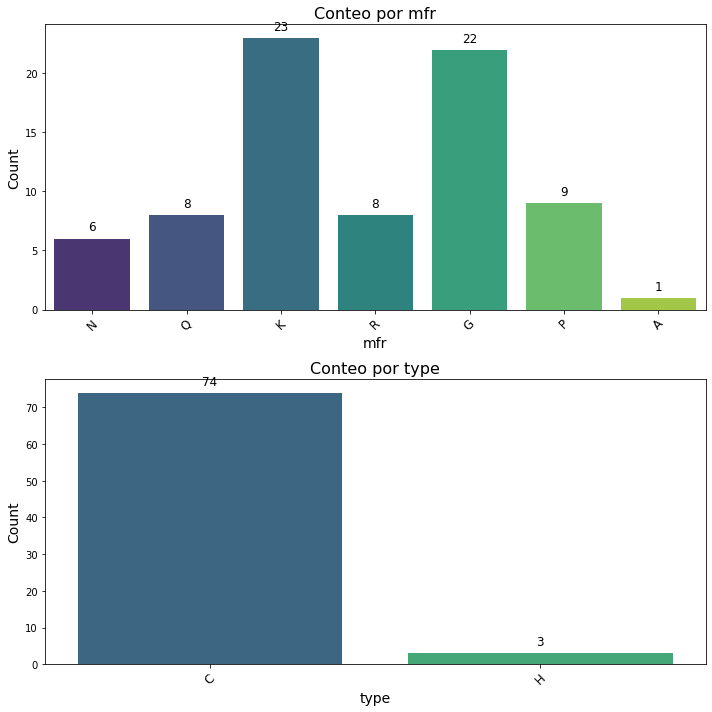

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.ravel()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas y los ejes correspondientes
for col, ax in zip(cat_cols_graf[:2], axes[:2]):
    # Crear una gráfica de conteo con countplot
    sns.countplot(x=col, data=cereals_df, ax=ax, palette='viridis')

    # Configurar etiquetas y título
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(f'Conteo por {col}', fontsize=16)

    ax.tick_params(axis='x', labelsize=12, labelrotation=45)

    # Agregar etiquetas
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
cat_cols = cereals_df.select_dtypes(exclude=np.number).columns.tolist()

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

* Contestando la pregunta: ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

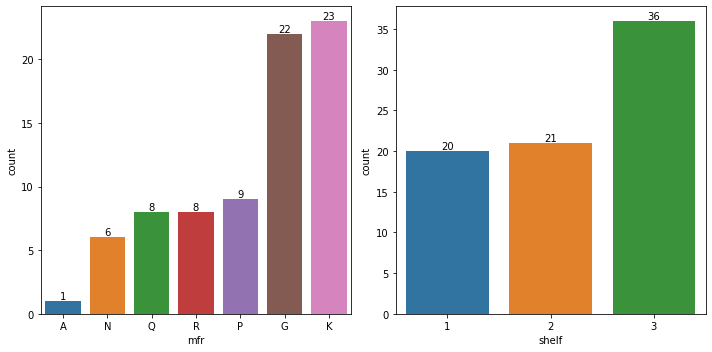

In [ ]:
#sns.set_palette('Blues')
fig, axes = plt.subplots(1,2,figsize=(10,5))
for i,el in enumerate(["mfr","shelf"]):
    a = sns.countplot(x=el, data=cereals_df, ax=axes.flatten()[i], order= cereals_df[el].value_counts(ascending=True).index)
    abs_values = cereals_df[el].value_counts(ascending=True).values
    a.bar_label(container=a.containers[0], labels=abs_values)

fig.tight_layout()

plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

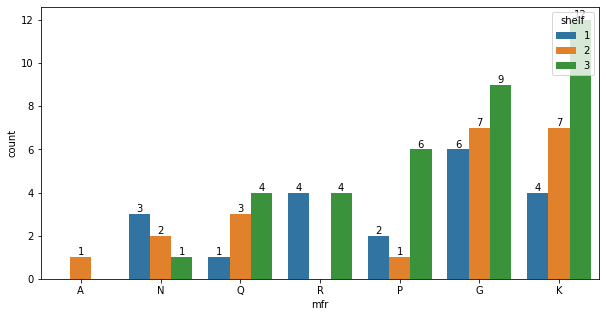

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(10,5))
a = sns.countplot(x="mfr", data=cereals_df, order= cereals_df["mfr"].value_counts(ascending=True).index, hue="shelf")
for i in a.containers:
    a.bar_label(i,)
plt.show()

Agregamos el detalle en forma tabular

In [ ]:
fabricante_estante = pd.crosstab(cereals_df['mfr'], cereals_df['shelf'])
fabricante_estante

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

Podemos ver en nuestro histograma para la variable `rating` que si dividemos el rango (Maximo - Mínimo) en 10 "bins", que la mayor frecuencia se encuentra en el tercer "bin"

Nota: Es importante mencionar que la respuesta de este ejercicio dependerá del número de bins seleccionado

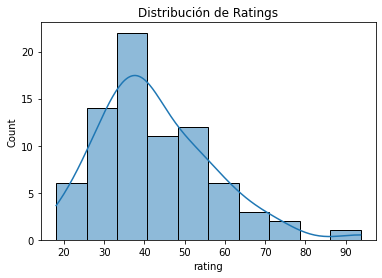

In [ ]:
sns.histplot(cereals_df['rating'], bins=10, kde=True)
plt.title('Distribución de Ratings')
plt.show()

A continuación podemos ver cúantos elementos se tienen en cada bin, en particular tenemos 22 elementos en el tercero

In [ ]:
pd.cut(cereals_df['rating'], bins=10).value_counts()

(33.175, 40.741]    22
(25.609, 33.175]    14
(48.308, 55.874]    12
(40.741, 48.308]    11
(17.967, 25.609]     6
(55.874, 63.44]      6
(63.44, 71.006]      3
(71.006, 78.572]     2
(86.139, 93.705]     1
(78.572, 86.139]     0
Name: rating, dtype: int64

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

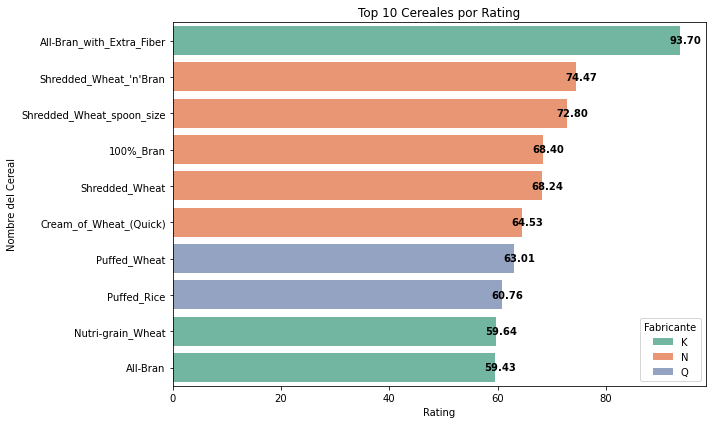

In [ ]:

# Seleccionar los datos y ordenar por 'rating'
top_cereals = cereals_df[['name', 'mfr', 'rating']].sort_values(by='rating', ascending=False).head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cereals, y='name', x='rating', hue='mfr', dodge=False, palette='Set2')

# Personalizar la gráfica
plt.title('Top 10 Cereales por Rating')
plt.xlabel('Rating')
plt.ylabel('Nombre del Cereal')
plt.legend(title='Fabricante')

# Agregar etiquetas con el valor de rating al final de cada barra
for index, (rating, name) in enumerate(zip(top_cereals['rating'], top_cereals['name'])):
    plt.text(rating + 1, index, f'{rating:.2f}', ha='center', va='center', color='black', fontweight='bold')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
top_10_cereales = cereals_df[['name', 'mfr', 'rating']].sort_values(by='rating', ascending=False).head(10)
top_10_cereales

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

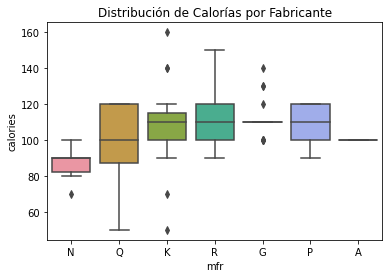

In [ ]:
sns.set_palette('Blues')
sns.boxplot(x='mfr', y='calories', data=cereals_df)
plt.title('Distribución de Calorías por Fabricante')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [ ]:
numeric_columns = cereals_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()



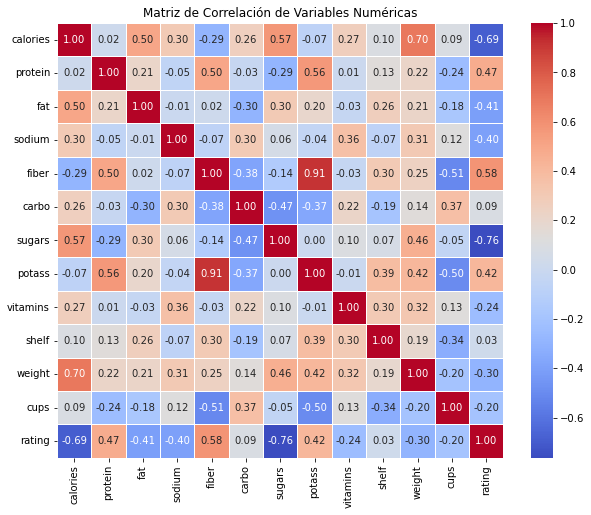

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [ ]:
cereals_df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


In [ ]:
abs_correlation_with_rating = correlation_matrix['rating'].abs().sort_values(ascending=False)
top_2_correlations = abs_correlation_with_rating.head(3)
top_2_correlations

rating      1.000000
sugars      0.763902
calories    0.689376
Name: rating, dtype: float64

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [ ]:
cereals_df.dropna(axis=0, inplace=True)
cereals_df.reset_index(drop=True, inplace=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
y = cereals_df['rating']

X = cereals_df.select_dtypes(include=['float64', 'int64']).drop(columns=['rating'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

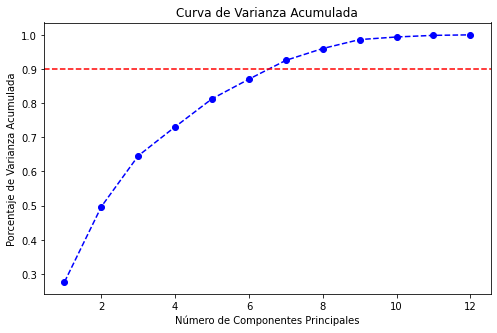

Número mínimo de componentes que explican más del 90% de la varianza: 7


In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='blue')
plt.title('Curva de Varianza Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Acumulada')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.show()

num_components = np.argmax(explained_variance >= 0.90) + 1
print(f'Número mínimo de componentes que explican más del 90% de la varianza: {num_components}')

In [ ]:

# Crear un DataFrame para mostrar la información de cada componente
explained_variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza Explicada (%)': pca.explained_variance_ratio_ * 100,
    'Varianza Acumulada (%)': explained_variance * 100
})

 # Mostrar los primeros componentes que explican más del 90% de la varianza
explained_variance_df.head(num_components)

,Componente Principal,Varianza Explicada (%),Varianza Acumulada (%)
0,PC1,27.661490,27.661490
1,PC2,22.059749,49.721239
2,PC3,14.883550,64.604788
3,PC4,8.479752,73.084540
4,PC5,8.202324,81.286864
5,PC6,5.748156,87.035019
6,PC7,5.498713,92.533733


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [ ]:
first_component = pca.components_[0]

variables_importance = pd.Series(first_component, index=X.columns)

top_3_variables = variables_importance.abs().sort_values(ascending=False).head(3)
print('Tres variables más importantes en el primer componente:')
top_3_variables

Tres variables más importantes en el primer componente:


potass    0.502603
fiber     0.458623
cups      0.371154
dtype: float64

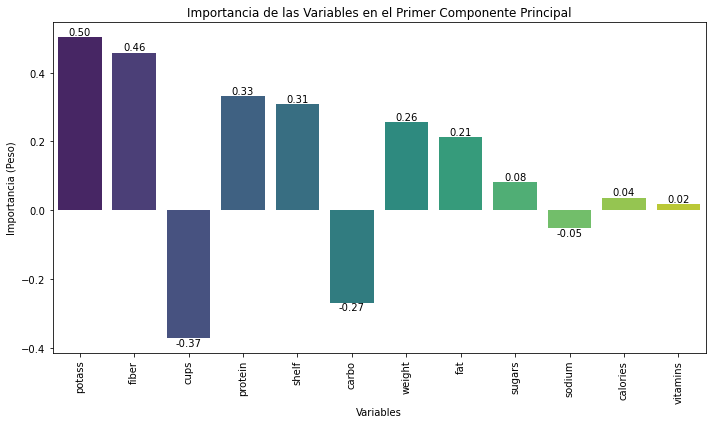

In [ ]:
# Ordenar las variables por el valor absoluto de sus pesos de mayor a menor
variables_importance = variables_importance.reindex(variables_importance.abs().sort_values(ascending=False).index)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=variables_importance.index, y=variables_importance.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Importancia de las Variables en el Primer Componente Principal')
plt.xlabel('Variables')
plt.ylabel('Importancia (Peso)')

# Agregar etiquetas a cada barra
for index, value in enumerate(variables_importance.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

In [ ]:
cereals_df_encoded = pd.get_dummies(cereals_df, columns=['mfr', 'shelf'], drop_first=True)

cereals_df_encoded.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,cups,rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3
0,100%_Bran,C,70,4,1,130,10.0,5.0,6.0,280.0,...,0.33,68.402973,0,0,1,0,0,0,0,1
1,100%_Natural_Bran,C,120,3,5,15,2.0,8.0,8.0,135.0,...,1.00,33.983679,0,0,0,0,1,0,0,1
2,All-Bran,C,70,4,1,260,9.0,7.0,5.0,320.0,...,0.33,59.425505,0,1,0,0,0,0,0,1
3,All-Bran_with_Extra_Fiber,C,50,4,0,140,14.0,8.0,0.0,330.0,...,0.50,93.704912,0,1,0,0,0,0,0,1
4,Apple_Cinnamon_Cheerios,C,110,2,2,180,1.5,10.5,10.0,70.0,...,0.75,29.509541,1,0,0,0,0,0,0,0


La variable objetivo es `rating`, por lo que podemos complementar el dataframe con las variables categóricas como variables predictoras, excepto `name` que muestra un valor distinto en cada registro y por lo tanto no actua realmente como una categoría.

Se usa One-Hot Encoding porque estas variables categóricas no son ordinales, es decir, no hay un orden lógico entre las categorías siendo variables nominales

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [ ]:
X_pca_selected = X_pca[:, :num_components]

X_pca_df = pd.DataFrame(X_pca_selected, columns=[f'PC{i+1}' for i in range(num_components)])

final_df = pd.concat([X_pca_df, cereals_df_encoded.drop(columns=['rating']), y], axis=1)

final_df.to_csv('C:/Users/julio/Downloads/cereals_pca_encoded.csv', index=False)



final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,name,type,calories,...,cups,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,100%_Bran,C,70,...,0.33,0,0,1,0,0,0,0,1,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,100%_Natural_Bran,C,120,...,1.00,0,0,0,0,1,0,0,1,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,All-Bran,C,70,...,0.33,0,1,0,0,0,0,0,1,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,All-Bran_with_Extra_Fiber,C,50,...,0.50,0,1,0,0,0,0,0,1,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,Apple_Cinnamon_Cheerios,C,110,...,0.75,1,0,0,0,0,0,0,0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,Triples,C,110,...,0.75,1,0,0,0,0,0,0,1,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,Trix,C,110,...,1.00,1,0,0,0,0,0,1,0,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,Wheat_Chex,C,100,...,0.67,0,0,0,0,0,1,0,0,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,Wheaties,C,100,...,1.00,1,0,0,0,0,0,0,0,51.592193
